In [ ]:
# Student ID: 1010737874
# Student name: Han Zheng
# Instructor: Dr. Shion Guha
# Course code: INF2178
# Program: MI
# Faculty of Information
# University of Toronto


# Assignment 4

# connect to google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.power as smp
import scipy.stats as stats
from scipy.stats import levene

%pip install pingouin
import pingouin as pg

In [ ]:
# import the dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/dataset/INF2178_A4_data.csv'
df = pd.read_csv(file_path)

# understand our dataset
df.head()
df.info()
df.describe()

# check if there is any missing values
missing_values_count = df.isna().sum()
print(missing_values_count)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  294 non-null    int64  
 1   Subject ID  294 non-null    object 
 2   MRI ID      294 non-null    object 
 3   Group       294 non-null    object 
 4   Visit       294 non-null    int64  
 5   MR Delay    294 non-null    int64  
 6   M/F         294 non-null    object 
 7   Hand        294 non-null    object 
 8   Age         294 non-null    int64  
 9   EDUC        294 non-null    int64  
 10  SES         279 non-null    float64
 11  MMSE        293 non-null    float64
 12  CDR         294 non-null    float64
 13  eTIV        294 non-null    int64  
 14  nWBV        294 non-null    float64
 15  ASF         294 non-null    float64
dtypes: float64(5), int64(6), object(5)
memory usage: 36.9+ KB
Unnamed: 0     0
Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay 

In [ ]:
# delete uninterested columns - 'Subject ID', 'MRI ID', 'MR Delay', 'Hand', 'CDR', 'EDUC', 'SES', 'MMSE'
reduced_dataset = df.drop(columns=['Subject ID', 'MRI ID', 'MR Delay', 'Hand', 'CDR', 'EDUC', 'SES', 'MMSE'])

# rename "Unnamed: 0" to "id"
df_rename = reduced_dataset.rename(columns={'Unnamed: 0': 'id'})

# drop na values
df_new = df_rename.dropna()

# visit our new dataset
print(df_new.head())
print(df_new.info())

   Unnamed: 0 Subject ID         MRI ID        Group  Visit  MR Delay M/F  \
0           0  OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M   
1           1  OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M   
4           5  OAS2_0004  OAS2_0004_MR1  Nondemented      1         0   F   
5           6  OAS2_0004  OAS2_0004_MR2  Nondemented      2       538   F   
6           7  OAS2_0005  OAS2_0005_MR1  Nondemented      1         0   M   

  Hand  Age  EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF  
0    R   87    14  2.0  27.0  0.0  1987  0.696  0.883  
1    R   88    14  2.0  30.0  0.0  2004  0.681  0.876  
4    R   88    18  3.0  28.0  0.0  1215  0.710  1.444  
5    R   90    18  3.0  27.0  0.0  1200  0.718  1.462  
6    R   80    12  4.0  28.0  0.0  1689  0.712  1.039  


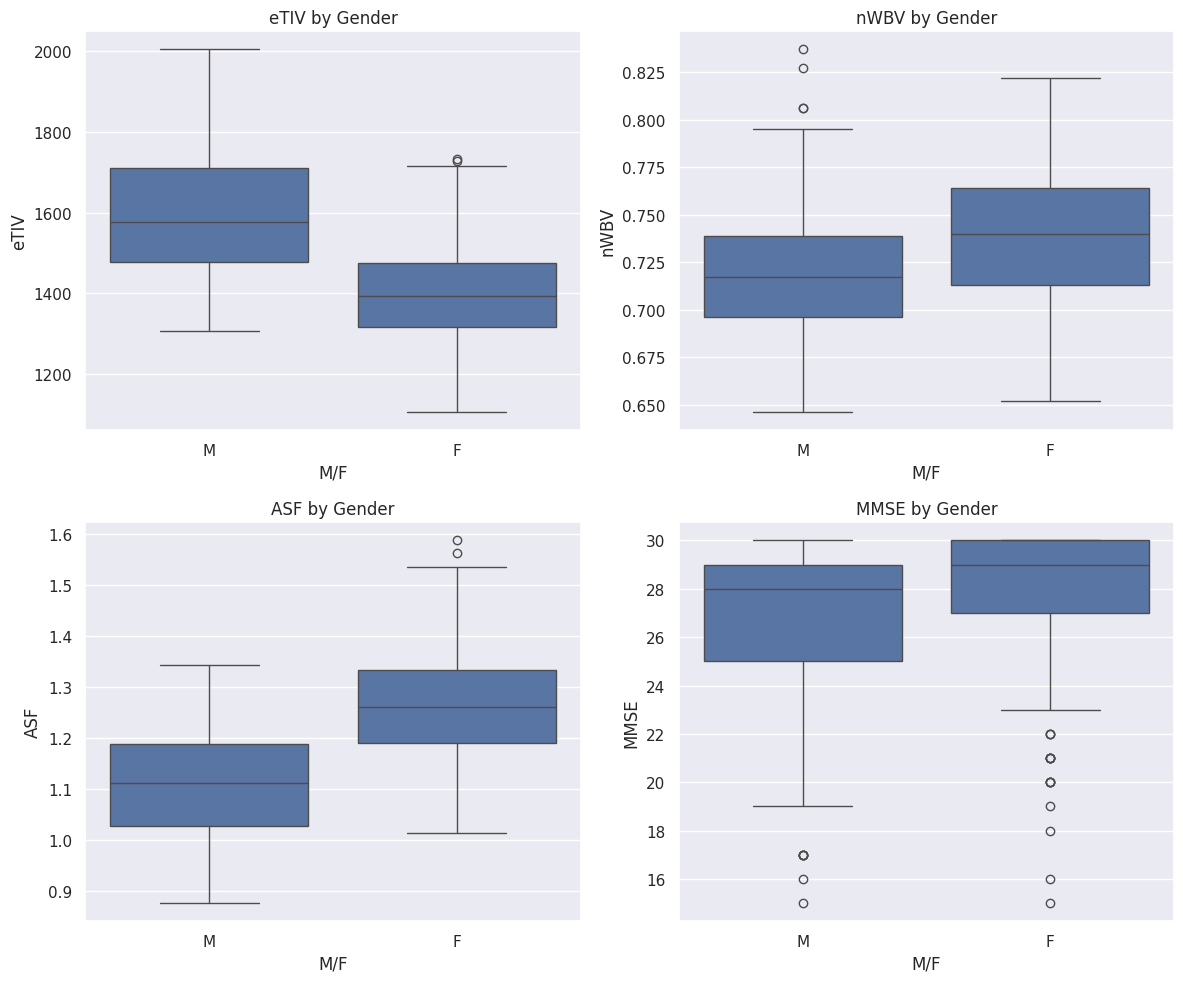

In [ ]:
# Interaction plots for 'eTIV', 'nWBV', and 'ASF' by gender

variables = ['eTIV', 'nWBV', 'ASF']
fig, axes = plt.subplots(1, 3, figsize=(9, 6))

for var, ax in zip(variables, axes.flatten()):
    sns.boxplot(x='M/F', y=var, data=df_new, ax=ax)
    ax.set_title(f'{var} by Gender')

plt.tight_layout()
plt.show()

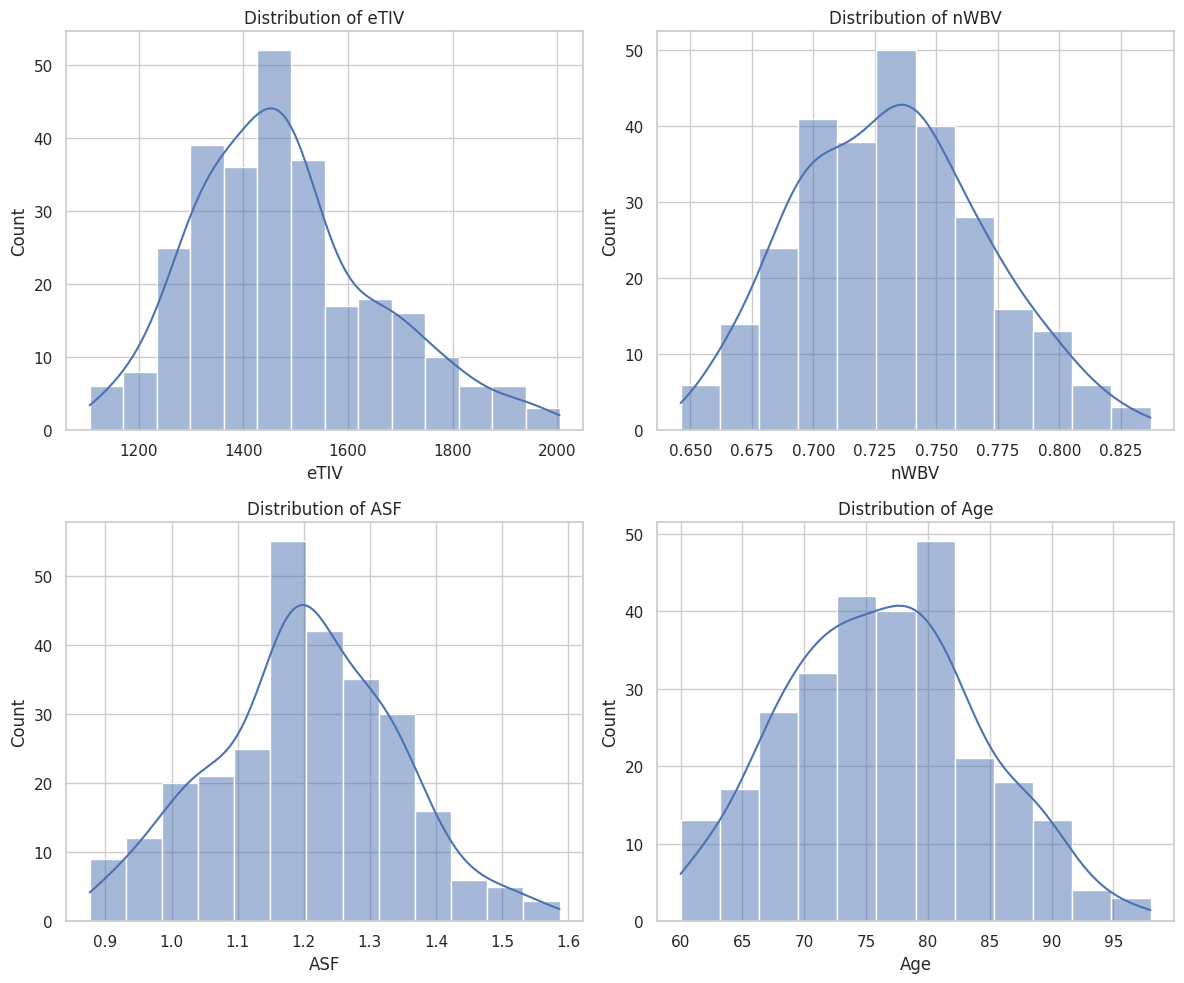

In [ ]:
# Histograms for 'eTIV', 'nWBV', 'ASF', and 'Age'

sns.set(style="whitegrid")

variables = ['eTIV', 'nWBV', 'ASF', 'Age']
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for var, ax in zip(variables, axes.flatten()):
    sns.histplot(data=df_new, x=var, kde=True, ax=ax)
    ax.set_title(f'Distribution of {var}')

plt.tight_layout()
plt.show()

eTIV     0
Visit    0
id       0
Group    0
dtype: int64
id         int64
Group     object
Visit      int64
M/F       object
Age        int64
MMSE     float64
eTIV       int64
nWBV     float64
ASF      float64
dtype: object
[1 2]


<ipython-input-93-95fcbf8f78f5>:15: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(data=df_new, x='Group', y='eTIV', hue='Visit', dodge=True, markers=['o', 's'],


ValueError: cannot convert float NaN to integer

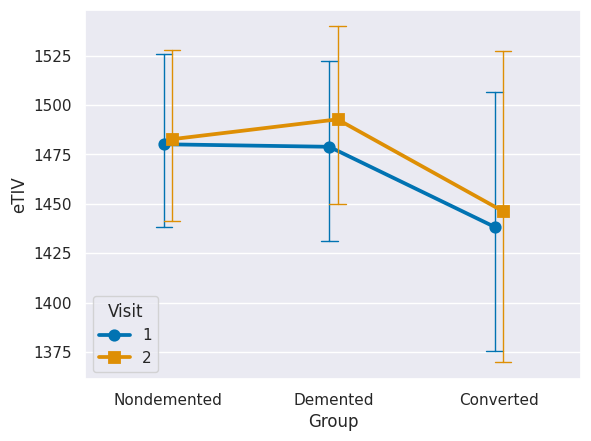

In [93]:
# MIXED EFFECTS ANOVA
# pg.mixed_anova(data=, dv=, within=, subject=, between=, correction='True'/'auto', effsize='np2'/'n2'/'ng2')

# 1. Does eTIV vary across different visit numbers and groups
# dependent variable: eTIV
# within subject factor: Visit
# between-subject identifier: id
# between factor: Group

print(df_new[['eTIV', 'Visit', 'id', 'Group']].isnull().sum())
print(df_new.dtypes)
print(df_new['Visit'].unique())

sns.set()
sns.pointplot(data=df_new, x='Group', y='eTIV', hue='Visit', dodge=True, markers=['o', 's'],
	      capsize=.1, errwidth=1, palette='colorblind')

#pg.mixed_anova(data=df_new, dv='eTIV', within='Visit', subject='id', between='Group', correction='auto', effsize='np2')

In [96]:
# Check assumptions - Homogeneity

# Group your data by the between-subjects factor and apply Levene's test
groups = df_new.groupby('Group')['eTIV'].apply(list)

# *groups unpacks the grouped data into separate arguments for levene()
stat, p = levene(*groups)

print('Levene’s test Statistic:', stat, 'P-Value:', p)

Levene’s test Statistic: 1.319442912677265 P-Value: 0.2689647048430881


In [ ]:
# Check assumptions - Sphericity
pg.sphericity(data=df_new, dv='eTIV', within='Visit', subject='id')[-1]

<class 'pandas.core.frame.DataFrame'>
Index: 279 entries, 0 to 293
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      279 non-null    int64  
 1   Group   279 non-null    object 
 2   Visit   279 non-null    int64  
 3   M/F     279 non-null    object 
 4   Age     279 non-null    int64  
 5   MMSE    279 non-null    float64
 6   eTIV    279 non-null    int64  
 7   nWBV    279 non-null    float64
 8   ASF     279 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 21.8+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 279 entries, 0 to 293
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      279 non-null    int64  
 1   Group   279 non-null    object 
 2   Visit   279 non-null    int64  
 3   M/F     279 non-null    object 
 4   Age     279 non-null    int64  
 5   MMSE    279 non-null    float64
 6   eTIV    279 non-null    int64  

In [ ]:
# Check assumptions - Normality

# Fit a mixed-effects model
model = smf.mixedlm("eTIV ~ Group + Visit", data=df_new, groups=df_new["id"])
result = model.fit()

# Extract residuals
residuals = result.resid

# Q-Q plot
plt.figure(figsize=(6, 4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Model Residuals')
plt.show()

# Shapiro-Wilk test
stat, p = stats.shapiro(residuals)
print('Shapiro-Wilk Test Statistic:', stat, 'P-Value:', p)

In [ ]:
# MIXED EFFECTS ANOVA
# pg.mixed_anova(data=, dv=, within=, subject=, between=, correction='True'/'auto', effsize='np2'/'n2'/'ng2')

# 2. Does nWBV vary across different visit numbers and groups
# dependent variable: nWBV
# within subject factor: Visit
# between-subject identifier: id
# between factor: Group

# check null values
print(df_new[['nWBV', 'Visit', 'id', 'Group']].isnull().sum())
# check types
print(df_new.dtypes)
# check uniqueness
print(df_new['Visit'].unique())

sns.set()
sns.pointplot(data=df_new, x='Group', y='nWBV', hue='Visit', dodge=True, markers=['o', 's'],
	      capsize=.1, errwidth=1, palette='colorblind')

#pg.mixed_anova(data=df_new, dv='nWBV', within='Visit', subject='id', between='Group', correction='auto', effsize='np2')

In [ ]:
# Check assumptions - Homogeneity

# Group your data by the between-subjects factor and apply Levene's test
groups1 = df_new.groupby('Group')['nWBV'].apply(list)

# *groups unpacks the grouped data into separate arguments for levene()
stat1, p1 = levene(*groups1)

print('Levene’s test Statistic:', stat1, 'P-Value:', p1)

In [ ]:
# Check assumptions - Sphericity
pg.sphericity(data=df_new, dv='nWBV', within='Visit', subject='id')[-1]

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


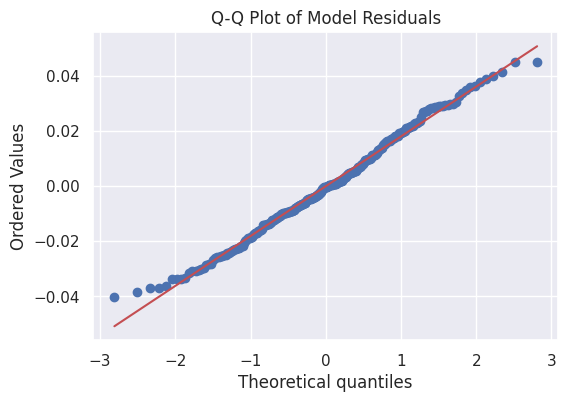

Shapiro-Wilk Test Statistic: 0.9915975332260132 P-Value: 0.11279669404029846


In [95]:
# Check assumptions - Normality

# Fit a mixed-effects model
model1 = smf.mixedlm("nWBV ~ Group + Visit", data=df_new, groups=df_new["id"])
result1 = model1.fit()

# Extract residuals
residuals1 = result1.resid

# Q-Q plot
plt.figure(figsize=(6, 4))
stats.probplot(residuals1, dist="norm", plot=plt)
plt.title('Q-Q Plot of Model Residuals')
plt.show()

# Shapiro-Wilk test
stat1, p1 = stats.shapiro(residuals1)
print('Shapiro-Wilk Test Statistic:', stat1, 'P-Value:', p1)

In [ ]:
# statistical power analysis plot for t-tests
analysis = smp.TTestIndPower()

# Calculate the sample size needed
sample_size = analysis.solve_power(effect_size=0.7, power=0.91, alpha=0.05)
sample_size